In [93]:
import pandas as pd
import numpy as np
import copy
flag = input('choose the logic function:')
if flag == '1':
    X = np.array([[0,0,1],[0,1,1],[1,0,1],[1,1,1]]) # transform to homogenous coordinate shape(4,3)
    y = np.array([0,0,0,1])  # true label d
    
elif flag =='2':
    X = np.array([[0,0,1],[0,1,1],[1,0,1],[1,1,1]]) # transform to homogenous coordinate shape(4,3)
    y = np.array([0,1,1,1])  # true label d
elif flag =='3':
    X = np.array([[0,1],[1,0]])
    y = np.array([1,0])
elif flag =='4':
    X = np.array([[0,0,1],[0,1,1],[1,0,1],[1,1,1]]) # transform to homogenous coordinate shape(4,3)
    y = np.array([1,1,1,0])  # true label d
elif flag =='5':
    X = np.array([[0,0,1],[0,1,1],[1,0,1],[1,1,1]]) # transform to homogenous coordinate shape(4,3)
    y = np.array([0,1,1,0])    
weights = np.random.rand(3,1)   # shape (3,1)
if flag =='3':
    weights = np.random.rand(2,1)
w_list = []
w_list.append(copy.deepcopy(weights))
learning_rate = 0.02 # 0.4 0.2 1.5

choose the logic function:5


In [94]:
def cal_error(X, w, y , error ):
    V = w.T @ X.T  # V=(1,m)
    d = np.array([0,0,0,0])
    for k in range (len(V[0])):
        if V[0,k] >0:
            d[k] =1
        elif V[0,k] <0:
            d[k] = 0
        error[k] = -d[k] +y[k]

    return error

In [95]:
iteration = 0
if flag ==3:
    error = cal_error(X, weights , y , [0,0])
else:
    error = cal_error(X, weights , y , [0,0,0,0])
print('Initial error:',error)
w = weights

while any(error):
    iteration += 1
    print('Iteration:',iteration )
    for i in range (len(X)):
        w += learning_rate *  error[i] * X[i].reshape(len(weights),1)    #  update weights by misclassified X(n)
    #print('\n update_weights:\n',w)
    w_list.append(copy.deepcopy(w))
    error  = cal_error(X, w , y , error)  # error(1,m)
    print('error:\n',error)
print('iteration times:',iteration)

In [ ]:
w1 = []
w2 = []
b = []
for ele in w_list:
    w1.append(ele[0])
    w2.append(ele[1])
    b.append(ele[2])

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (7,5))
plt.plot(w1,label = 'w1')
plt.plot(w2, label = 'w2')
plt.plot(b,label = 'b')
plt.title('COMPLEMENT function')
plt.legend(loc='best')


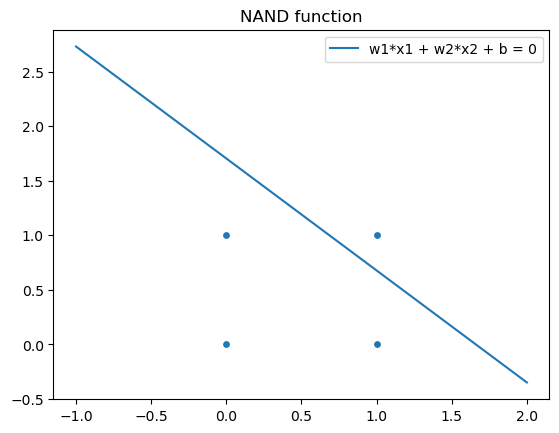

In [87]:
plt.scatter([0,1,0,1],[0,0,1,1],s = 15)
x1_values = np.linspace(-1,2)
x2_values = (-w1[-1] * x1_values - b[-1]) / w2[-1]

# 绘制直线
plt.plot(x1_values, x2_values, label='w1*x1 + w2*x2 + b = 0')
plt.title('NAND function')
plt.legend(loc = 'best')

Text(0.5, 1.0, 'COMPLEMEMT function')

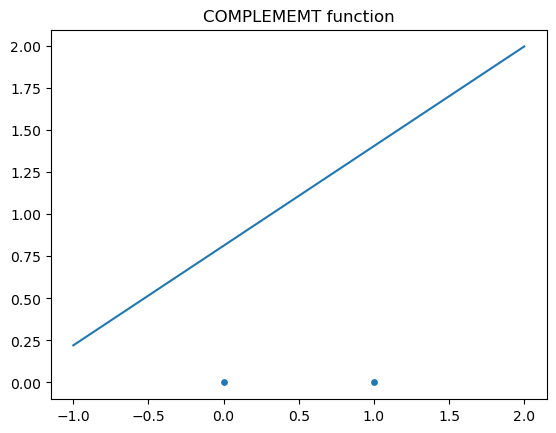

In [71]:
## plot of OR function

plt.scatter([0,1],[0,0],s = 15)
x1_values = np.linspace(-1,2)
x2_values = (w1[-1] * x1_values ) + w2[-1]
plt.plot(x1_values, x2_values, label='w1*x1 + w2*x2 + b = 0')
plt.title('OR function')
plt.legend(loc = 'best')